In [99]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline
# warnings.filterwarnings('ignore')
# pd.set_option('display.precision', 4)
# %precision %.4f

### Загрузка датасета

In [100]:
df = pd.read_csv("car_price.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [102]:
df.drop(columns=['car_ID'], inplace=True)
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [103]:
df.isnull().sum()


symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [104]:
df.shape

(205, 25)

In [105]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


array([[<AxesSubplot: title={'center': 'symboling'}>,
        <AxesSubplot: title={'center': 'wheelbase'}>,
        <AxesSubplot: title={'center': 'carlength'}>,
        <AxesSubplot: title={'center': 'carwidth'}>],
       [<AxesSubplot: title={'center': 'carheight'}>,
        <AxesSubplot: title={'center': 'curbweight'}>,
        <AxesSubplot: title={'center': 'enginesize'}>,
        <AxesSubplot: title={'center': 'boreratio'}>],
       [<AxesSubplot: title={'center': 'stroke'}>,
        <AxesSubplot: title={'center': 'compressionratio'}>,
        <AxesSubplot: title={'center': 'horsepower'}>,
        <AxesSubplot: title={'center': 'peakrpm'}>],
       [<AxesSubplot: title={'center': 'citympg'}>,
        <AxesSubplot: title={'center': 'highwaympg'}>,
        <AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >]],
      dtype=object)

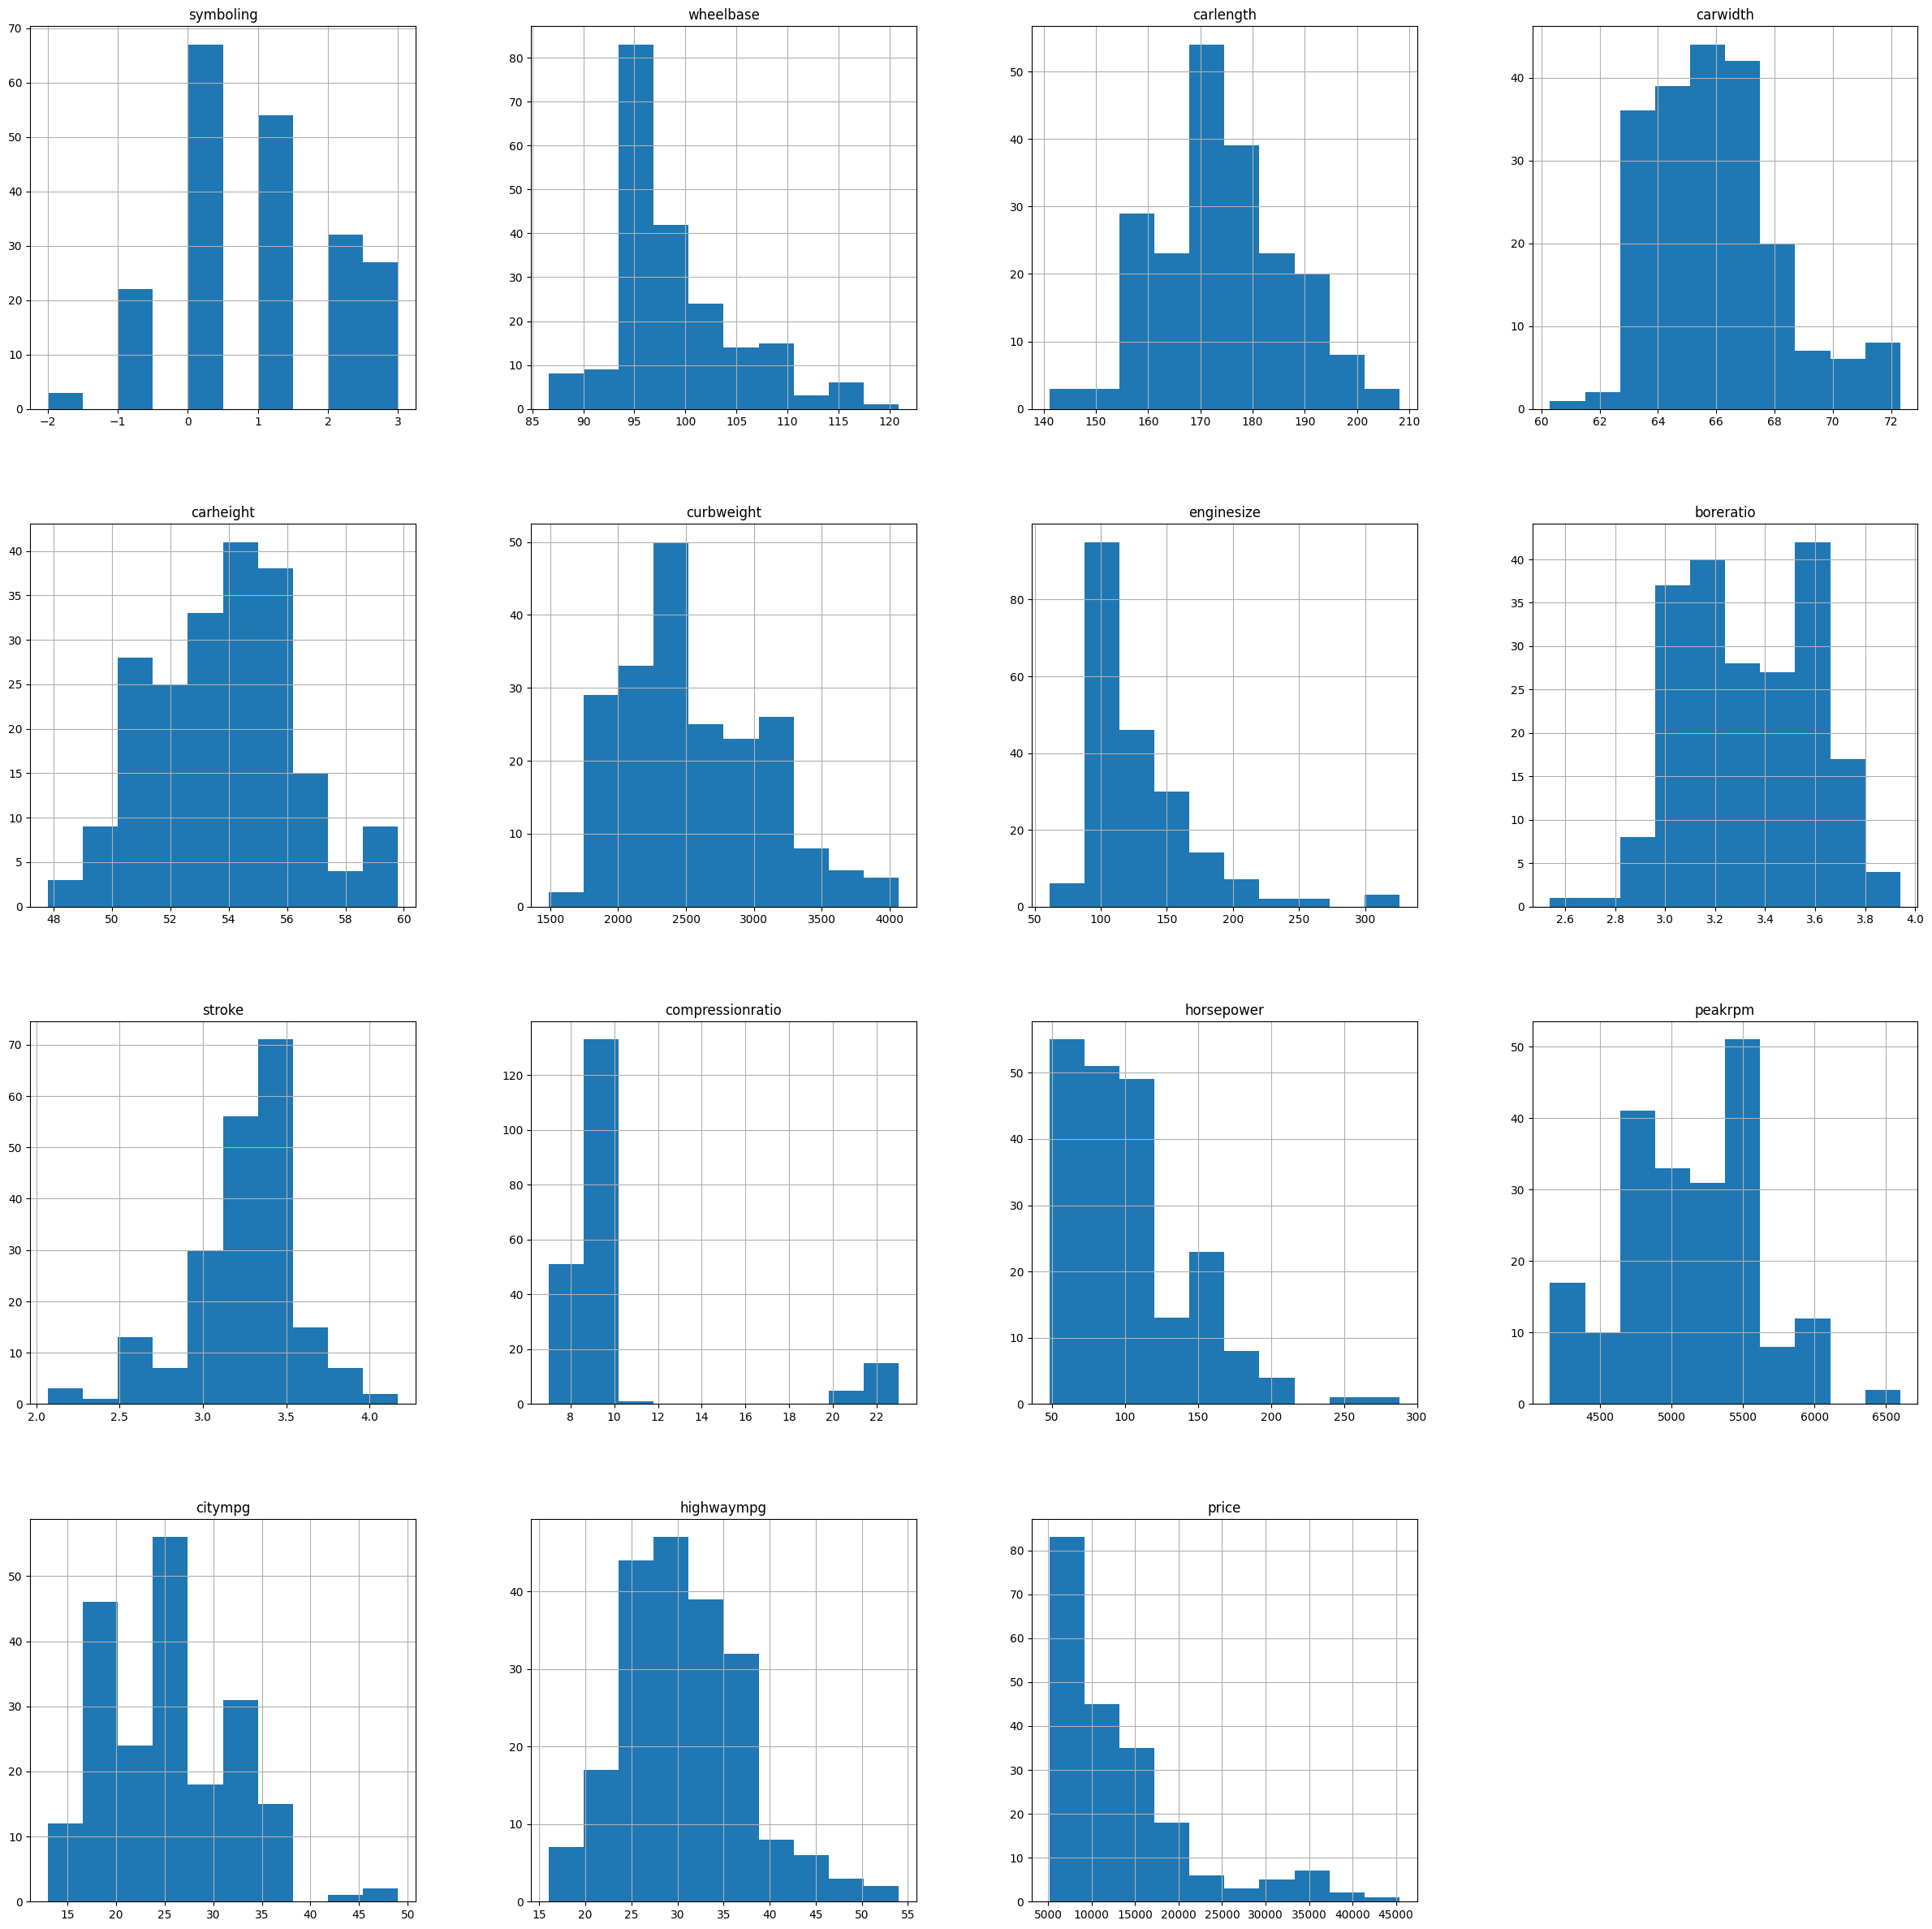

In [106]:
df.hist(figsize =(30,30))

<AxesSubplot: >

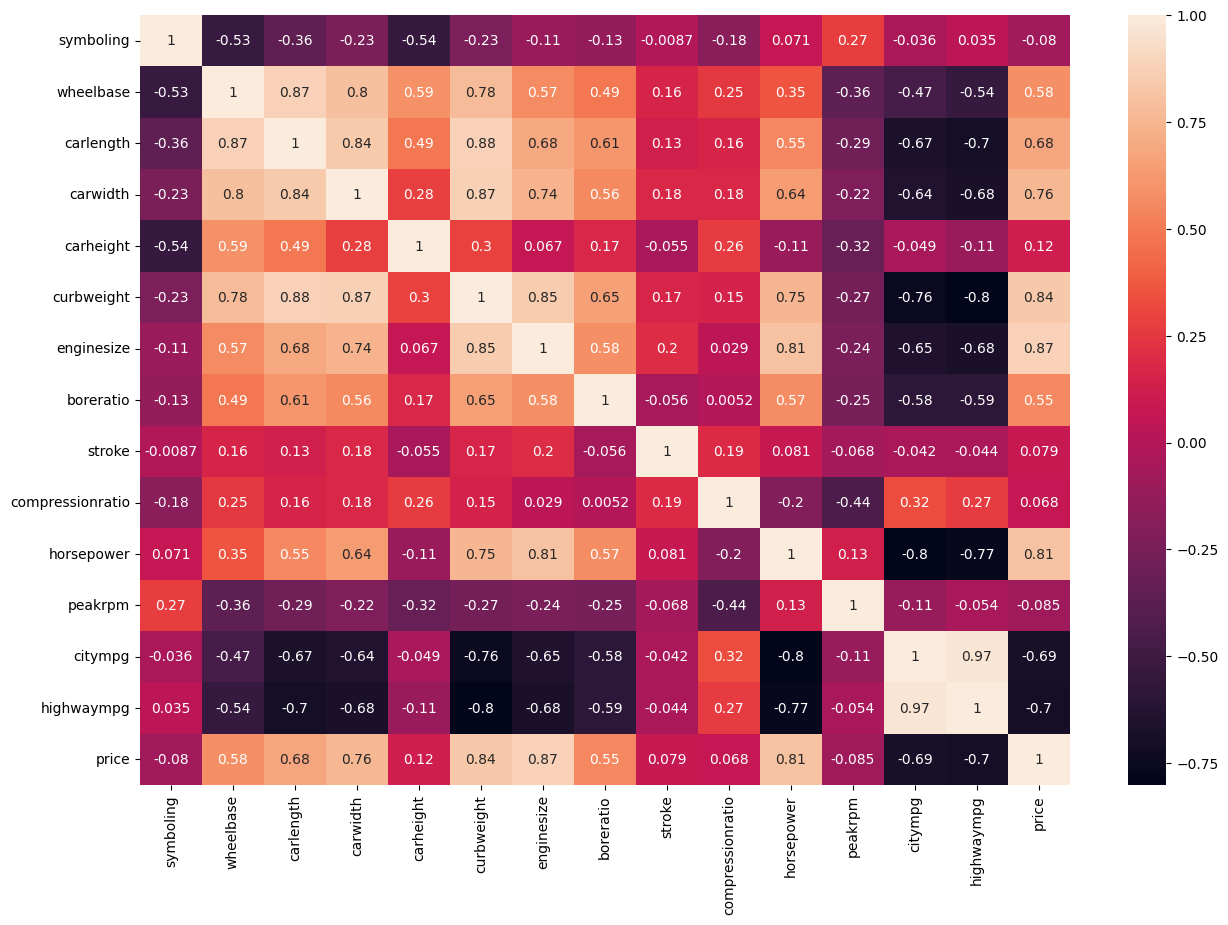

In [107]:
df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

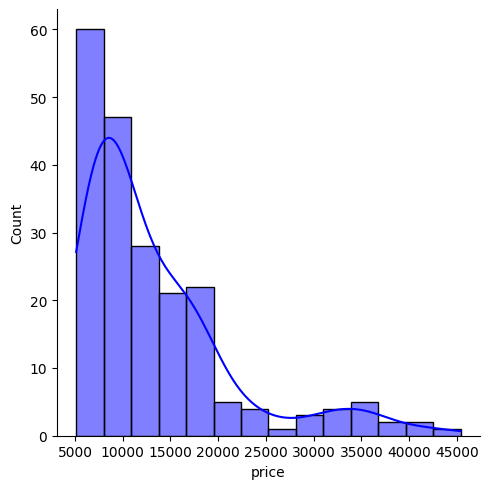

In [108]:
sns.displot(data=df, x="price", kde = True, color = 'b') 
plt.show()

In [109]:
df['fueltype'].replace(['gas', 'diesel'], [0, 1], inplace=True)
df['aspiration'].replace(['std', 'turbo'], [0, 1], inplace=True)
df['doornumber'].replace(['two', 'four'], [2, 4], inplace=True)
df['carbody'].replace(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], [0, 1, 2, 3, 4], inplace=True)
df['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3], inplace=True)
df['enginelocation'].replace(['front', 'rear'], [1, 2], inplace=True)
df['enginetype'].replace(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
df['fuelsystem'].replace(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
df['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [4, 6, 5, 3, 12, 2, 8], inplace=True)

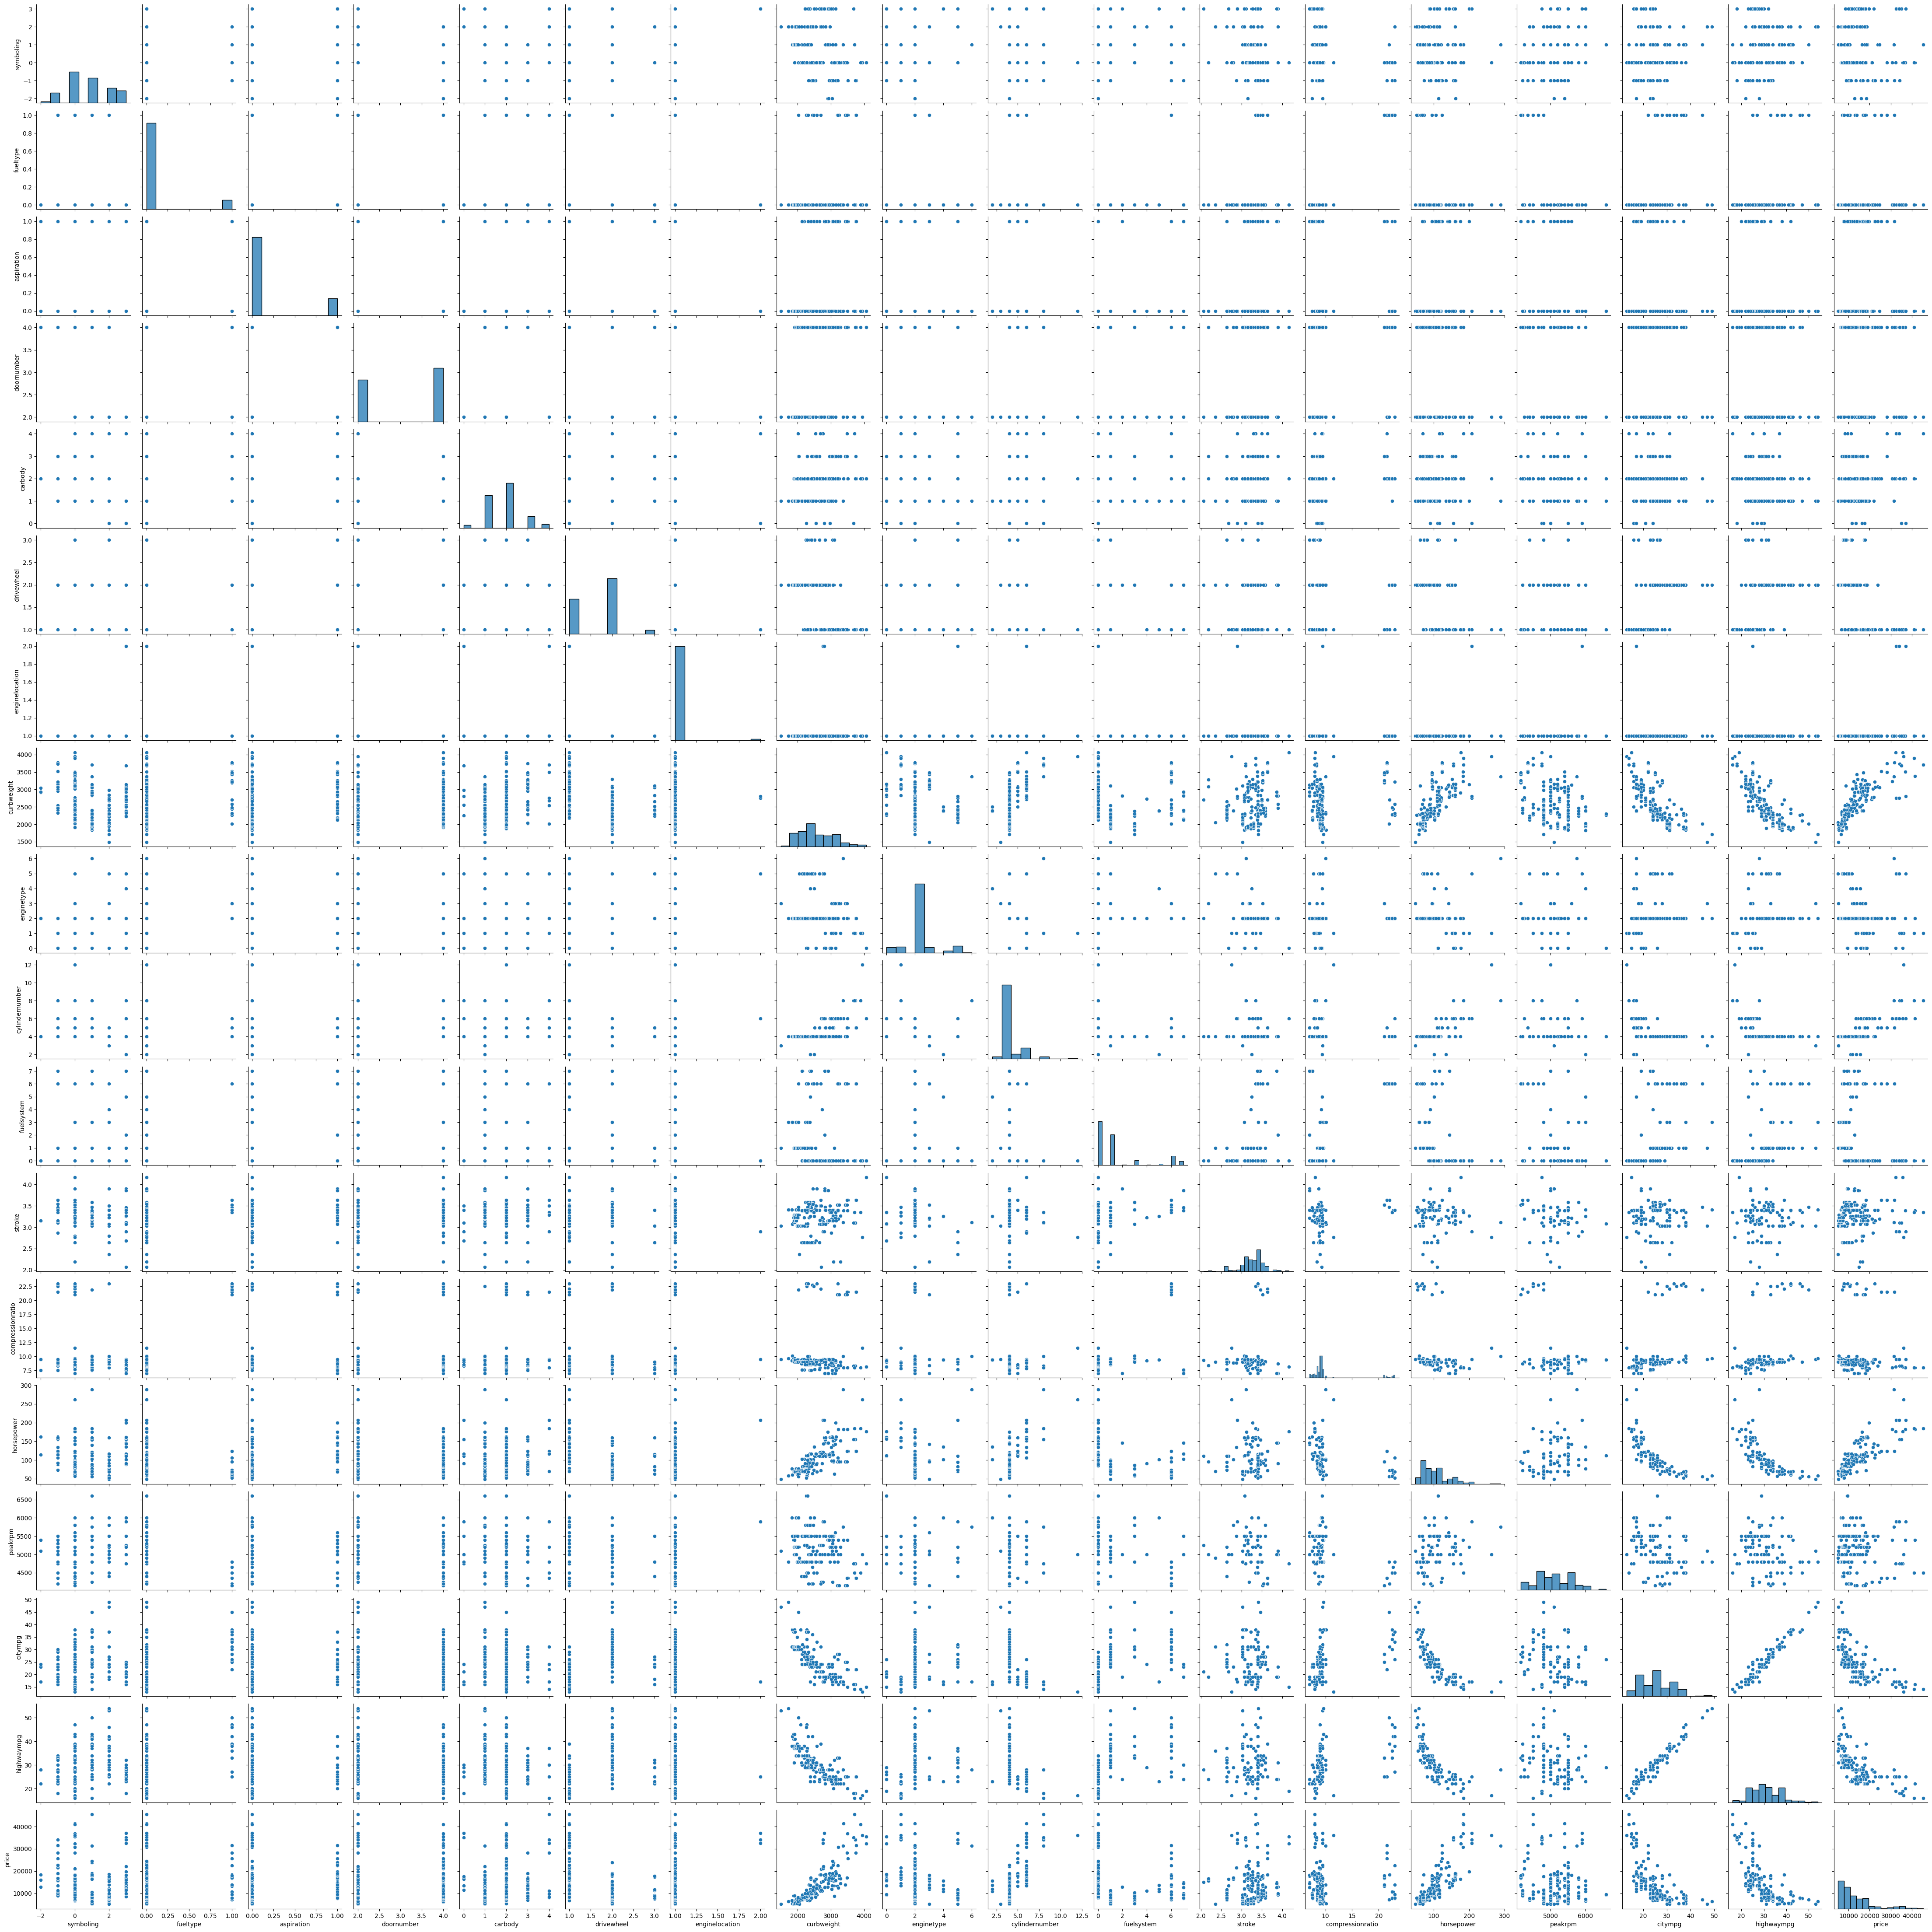

In [95]:
sns.pairplot(df)

#### Удаление ненужных признаков

In [110]:
df = df.drop(columns=["wheelbase", "CarName", "carlength", "carheight", "carwidth", "enginesize", "boreratio"])
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,enginetype,cylindernumber,fuelsystem,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,0,1,1,2548,0,4,0,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,0,1,1,2548,0,4,0,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,2,1,1,1,2823,1,6,0,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,4,2,2,1,2337,2,4,0,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,4,2,3,1,2824,2,5,0,3.40,8.0,115,5500,18,22,17450.0


### Функция gradient_descent(X, y)

In [332]:
def gradient_descent(X, y, alpha=1, acepted_delta=1):
    n = X.shape[1]
    Z = np.ones((X.shape[0], 1))
    Xl = np.concatenate((Z,X), axis=1)
    nf = n + 1
    W = np.ones(nf)
    old_cost = 0
    k = 1
    Q = 0
    while True:
        y_pred = Xl.dot(W)
        loss = y_pred - y
    # Calculate Gradient
        RL2 = np.sum(np.square(W[1:]))
        Q = np.sum(loss ** 2) / n + 2.0 * alpha * RL2
        gradient = (2.0 / n) * Xl.T.dot(loss) + alpha * W
        lambd = 1 / k
        k += 1
        W = W - lambd * gradient    
        if abs(Q - old_cost) < acepted_delta:
            break   
        old_cost = Q
    print(k)
    return W

### Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [333]:
y = df["price"]
X = df.drop(columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Масштабирование данных

In [334]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### (+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).

In [335]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7)
labelencoder = LabelEncoder()
y_transform = labelencoder.fit_transform(y_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
rfe.fit(X_train_scaled_df, y_transform)
rfe = rfe.fit(X_train_scaled_df, y_transform)
print('Selected features: %s' % list(X_train.columns[rfe.support_]))

Selected features: ['symboling', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg']


##### (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

Text(0, 0.5, 'CV score')

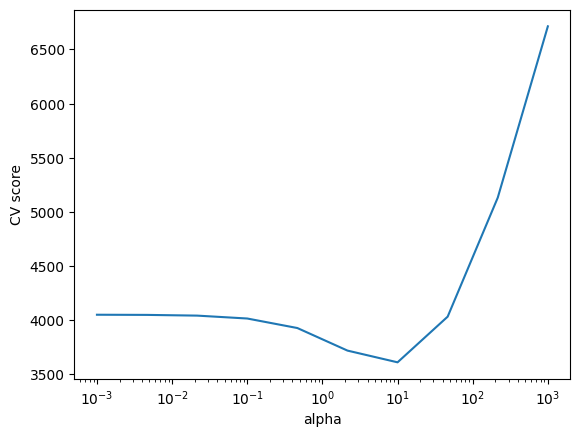

In [336]:
alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=2)
searcher.fit(X_train_scaled, y_train)
plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [337]:
epsilon_grid = np.logspace(-3, 3, 10)
searcher_e = GridSearchCV(Ridge(), [{"tol": epsilon_grid}], scoring="neg_root_mean_squared_error", cv=2)
searcher_e.fit(X_train_scaled, y_train);

In [338]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 10.0000


In [339]:
best_epsilon = searcher_e.best_params_["tol"]
print("Best epsilon = %.3f" % best_epsilon)

Best epsilon = 0.001


#### Разобьём данные подобранных признаков данные на обучающую и тестовую выборки и масштабируем их.

In [348]:
df_best = df[['symboling', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg', 'price']]
y = df_best['price']
X = df_best.drop(['price'], axis=1)

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled_best = scaler.fit_transform(X_train_best)
X_test_scaled_best = scaler.transform(X_test_best)

##### Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.

In [349]:
weight = gradient_descent(X_train_scaled_best, y_train_best, best_alpha, acepted_delta=0.001)

452


In [350]:
weight

array([10772.        ,   131.50761253,   -14.36003589,   953.62317898,
       -2127.03435776,    57.60672241,  -716.49454545, -3665.09914247])

#### Качество модели  с оптимальными гиперпараметрами и признаками.

In [351]:
def Model_l(x, weight):
    ones = np.ones((x.shape[0], 1))
    X = np.concatenate((ones,x), axis=1) 
    return np.matmul(X, weight)

In [352]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

y_train_best_model = Model_l(X_train_scaled_best, weight)
y_test_best_model = Model_l(X_test_scaled_best, weight)
print("R2:")
print("test R2 =", r2_score(y_test_best, y_test_best_model))
print("train R2 =", r2_score(y_train_best, y_train_best_model), "\n")
print("MSE:")
print("MSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=True))
print("MSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=True), "\n")
print("RMSE:")
print("RMSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=False))
print("RMSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=False))




R2:
test R2 = 0.34680028847685607
train R2 = 0.5072286146437477 

MSE:
MSE test = 45256536.12194666
MSE train = 30034227.289581344 

RMSE:
RMSE test = 6727.297832112583
RMSE train = 5480.349194128175


In [353]:
model = Ridge(alpha=best_alpha, tol=best_epsilon)
model.fit(X_train_scaled_best, y_train_best);
y_train_ridge = model.predict(X_train_scaled_best)
y_test_ridge = model.predict(X_test_scaled_best)

print("R2:")
print("R2 test =", r2_score(y_test_best, y_test_best_model))
print("R2 test Ridge =", r2_score(y_test_best, y_test_ridge))
print("R2 train =", r2_score(y_train_best, y_train_best_model))
print("R2 train Ridge =", r2_score(y_train_best, y_train_ridge), "\n")
print("MSE:")
print("MSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=True))
print("MSE test Ridge =", mean_squared_error(y_test_best, y_test_ridge, squared=True))
print("MSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=True))
print("MSE train Ridge=", mean_squared_error(y_train_best, y_train_ridge, squared=True), "\n")
print("RMSE:")
print("RMSE test =", mean_squared_error(y_test_best, y_test_best_model, squared=False))
print("RMSE test Ridge =", mean_squared_error(y_test_best, y_test_ridge, squared=False))
print("RMSE train =", mean_squared_error(y_train_best, y_train_best_model, squared=False))
print("RMSE train Ridge =", mean_squared_error(y_train_best, y_train_ridge, squared=False), "\n")

R2:
R2 test = 0.34680028847685607
R2 test Ridge= 0.4615153435854873
R2 train = 0.5072286146437477
R2 train Ridge= 0.6341854346075484 

MSE:
MSE test = 45256536.12194666
MSE test Ridge = 37308574.81138672
MSE train = 30034227.289581344
MSE train Ridge= 22296257.715721898 

RMSE:
RMSE test = 6727.297832112583
RMSE test Ridge= 6108.074558433837
RMSE train = 5480.349194128175
RMSE train Ridge= 4721.89132824146 



In [355]:
results_df = pd.DataFrame(index=['MSE test',
                                 'MSE train',
                                 'RMSE test', 
                                 'RMSE train',
                                 'R2 test', 
                                 'R2 train'])
k_fold = KFold(n_splits=5)
fold_df = X_train_scaled_df[['symboling', 'doornumber', 'carbody', 'drivewheel', 'stroke', 'peakrpm', 'citympg']]

for fold, (train, test) in enumerate(k_fold.split(X=fold_df , y=y_train_best)):
    weight = gradient_descent(fold_df.iloc[train, :], y_train_best.iloc[train],
                            alpha=best_alpha, acepted_delta=0.001)

    y_fold_test = Model_l(fold_df.iloc[test, :], weight)
    y_fold_train = Model_l(fold_df.iloc[train, :], weight)
    

    results_df.insert(fold, f'Fold {fold + 1}',
                         [mean_squared_error(y_train_best.iloc[test], y_fold_test, squared=True),
                          mean_squared_error(y_train_best.iloc[train], y_fold_train, squared=True),
                          mean_squared_error(y_train_best.iloc[test], y_fold_test, squared=False),
                          mean_squared_error(y_train_best.iloc[train], y_fold_train, squared=False),
                          r2_score(y_train_best.iloc[test], y_fold_test),
                          r2_score(y_train_best.iloc[train], y_fold_train)])
                          

E = results_df.mean(axis=1)
std = results_df.std(axis=1)
results_df["E"] = E
results_df["STD"] = std

results_df

304
310
245
225
290


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,E,STD
MSE test,2.005950e+07,2.552523e+07,3.867263e+07,5.061744e+07,5.372315e+07,3.771959e+07,1.486572e+07
MSE train,3.610393e+07,3.396481e+07,3.272906e+07,3.093841e+07,3.116558e+07,3.298036e+07,2.136115e+06
RMSE test,4.478783e+03,5.052250e+03,6.218732e+03,7.114594e+03,7.329608e+03,6.038793e+03,1.251282e+03
RMSE train,6.008654e+03,5.827934e+03,5.720932e+03,5.562230e+03,5.582614e+03,5.740473e+03,1.848258e+02
R2 test,5.144418e-01,2.453787e-01,3.725578e-01,3.123990e-01,3.942008e-01,3.677956e-01,1.003490e-01
R2 train,4.498798e-01,4.953152e-01,4.608484e-01,4.570725e-01,4.205221e-01,4.567276e-01,2.675738e-02
